# (1) Train predicator (classifier) for AFA 
The AFA problem contains the training of a classifier that is able to predict well based on any acquired subset of features. 
In this notebook we train and save such a classifier 

In [1]:
%load_ext autoreload
%autoreload 2

## Define paths

Paths for data

In [2]:
from afa.configurations.utils_ts import specify_default_paths_ts
# which dataset to work on 
dataset_name   = "synthetic_1"

# name for of missingness scenario 
miss_scenario  = 'MCAR_1'

# automatically specify some path locations (change paths manually if needed) 
paths = specify_default_paths_ts(dataset_name = dataset_name , miss_scenario = miss_scenario) 

Paths for model

In [3]:
# name for predictor 
predictor_model_name  = 'logistic_regression'

# new (where to save the model) 
predictor_model_dir = paths['data_dir'] + 'predictor_models' + '/' + predictor_model_name + '/'

## Load dataset with missingness 
At first, we want to load the dataset 

Includes loading: 
- superfeature mapping
- problem
- afa_problem 
- missingness_model

In [4]:
from afa.data_modelling.datasets.data_loader.data_loader_ts import DataLoader_ts

2023-02-27 18:35:23.180026: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 18:35:23.302390: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-27 18:35:23.302410: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-27 18:35:23.977327: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [5]:
data_loader = DataLoader_ts(     data_file                  = paths['data_file'],
                                 temporal_data_file         = paths['temporal_data_file'],
                                 superfeature_mapping_file  = paths['superfeature_mapping_file'],
                                 problem_file               = paths['problem_file'],
                                 afa_problem_files          = paths['afa_problem_files'], 
                                 miss_model_files           = paths['miss_model_files'], 
                                 folds_file                 = paths['folds_file'] )
dataset = data_loader.load() 

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 699.38it/s]


## Create afa dataset with missingness 
To train an AFA predictor, we need to induce artificial missingness (such that the predictor is robust to the missingness pattern). 
Here, we use a simple model to create missingness randomly (MCAR).

In [6]:
from afa.afa_datasets.utils_ts import create_MCAR_afa_dataset_ts

In [7]:
afa_dataset = create_MCAR_afa_dataset_ts( dataset, MCAR_ratio = 0.9, n_samples = 5)

Change base_model to stationary_constant
Change base_model to stationary_constant
Set weight for constant stationary model ...
Set weight for constant stationary model ...


## Train Predictor 

### Initialize predictor 

In [8]:
from afa.afa_models.afa_predictors.afa_predictor_ts import AFAPredictor_ts

In [9]:
predictor_model_params = {
    'name' : predictor_model_name, 
    'directory': predictor_model_dir,
    'base_model_params' : {   'model_type': 'ImputeThenRegress',
                              'imputer_params' : 
                                       {   
                                      'model_type': 'simple_imputer',
                                      'mode' : 'imputation'
                                      },
                              'predictor_params' : 
                                       {   
                                      'model_type': 'ann',
                                      'mode' : 'classification',
                                      'units':              1,
                                      'layers': 1,
                                      'learning_rate': 0.01,
                                      'batch_size' :128,
                                      'epochs': 100 
                                      }
                          }
    }

In [10]:
afa_predictor = AFAPredictor_ts(    name            = predictor_model_params['name'], 
                                    model_params    = predictor_model_params, 
                                    directory       = predictor_model_params['directory'])   

2023-02-27 18:35:29.799799: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-27 18:35:29.800132: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-27 18:35:29.800302: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-02-27 18:35:29.800508: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-02-27 18:35:29.800590: W tensorf

Epoch 1/100


2023-02-27 18:35:30.352021: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-02-27 18:35:30.352066: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-02-27 18:35:30.352152: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1664] Profiler found 1 GPUs
2023-02-27 18:35:30.352864: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcupti.so.11.2'; dlerror: libcupti.so.11.2: cannot open shared object file: No such file or directory
2023-02-27 18:35:30.352999: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcupti.so'; dlerror: libcupti.so: cannot open shared object file: No such file or directory
2023-02-27 18:35:30.353054: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:135] cuptiGetTimestamp: error 999: 
2023-02-27 18:35:30.353068: E tensorflow/core/profiler/backends/

2/2 [==============================] - 1s 205ms/step - loss: 0.7657 - binary_accuracy: 0.5444 - val_loss: 0.6088 - val_binary_accuracy: 0.6500
Epoch 2/100
2/2 [==============================] - 0s 40ms/step - loss: 0.7547 - binary_accuracy: 0.5722 - val_loss: 0.6034 - val_binary_accuracy: 0.6500
Epoch 3/100
2/2 [==============================] - 0s 40ms/step - loss: 0.7438 - binary_accuracy: 0.5833 - val_loss: 0.5982 - val_binary_accuracy: 0.6000
Epoch 4/100
2/2 [==============================] - 0s 36ms/step - loss: 0.7328 - binary_accuracy: 0.5833 - val_loss: 0.5930 - val_binary_accuracy: 0.6000
Epoch 5/100
2/2 [==============================] - 0s 39ms/step - loss: 0.7227 - binary_accuracy: 0.5889 - val_loss: 0.5877 - val_binary_accuracy: 0.6500
Epoch 6/100
2/2 [==============================] - 0s 38ms/step - loss: 0.7128 - binary_accuracy: 0.5889 - val_loss: 0.5826 - val_binary_accuracy: 0.6500
Epoch 7/100
2/2 [==============================] - 0s 46ms/step - loss: 0.7028 - binary

2023-02-27 18:35:31.748915: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-02-27 18:35:31.749025: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-02-27 18:35:31.749263: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:133] cuptiGetTimestamp: ignored due to a previous error.
2023-02-27 18:35:31.749288: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:184] cuptiSubscribe: ignored due to a previous error.
2023-02-27 18:35:31.749293: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:457] cuptiGetResultString: ignored due to a previous error.
2023-02-27 18:35:31.749299: E tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1715] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error 


2/2 [==============================] - 0s 39ms/step - loss: 0.6677 - binary_accuracy: 0.6111 - val_loss: 0.5599 - val_binary_accuracy: 0.7000
Epoch 12/100
2/2 [==============================] - 0s 39ms/step - loss: 0.6592 - binary_accuracy: 0.6278 - val_loss: 0.5558 - val_binary_accuracy: 0.7000
Epoch 13/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6511 - binary_accuracy: 0.6333 - val_loss: 0.5520 - val_binary_accuracy: 0.7000
Epoch 14/100
2/2 [==============================] - 0s 39ms/step - loss: 0.6440 - binary_accuracy: 0.6444 - val_loss: 0.5485 - val_binary_accuracy: 0.7000
Epoch 15/100
2/2 [==============================] - 0s 41ms/step - loss: 0.6366 - binary_accuracy: 0.6500 - val_loss: 0.5451 - val_binary_accuracy: 0.7000
Epoch 16/100
2/2 [==============================] - 0s 44ms/step - loss: 0.6295 - binary_accuracy: 0.6722 - val_loss: 0.5418 - val_binary_accuracy: 0.7500
Epoch 17/100
2/2 [==============================] - 0s 44ms/step - loss: 0.6223 - b

2023-02-27 18:35:32.364071: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2023-02-27 18:35:32.364768: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:140] cuptiFinalize: ignored due to a previous error.
2023-02-27 18:35:32.364814: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:457] cuptiGetResultString: ignored due to a previous error.
2023-02-27 18:35:32.364824: E tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1807] function cupti_interface_->Finalize()failed with error 
2023-02-27 18:35:32.374886: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:133] cuptiGetTimestamp: ignored due to a previous error.
2023-02-27 18:35:32.374952: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:133] cuptiGetTimestamp: ignored due to a previous error.
2023-02-27 18:35:32.374965: I tensorflow/core/profiler/backends/gpu/cupti_collector.cc:522]  GpuTracer has collected 0 callback api events and 0 a

2/2 [==============================] - 0s 43ms/step - loss: 0.5978 - binary_accuracy: 0.6667 - val_loss: 0.5261 - val_binary_accuracy: 0.7000
Epoch 22/100
2/2 [==============================] - 0s 37ms/step - loss: 0.5922 - binary_accuracy: 0.6611 - val_loss: 0.5235 - val_binary_accuracy: 0.7000
Epoch 23/100
2/2 [==============================] - 0s 42ms/step - loss: 0.5869 - binary_accuracy: 0.6667 - val_loss: 0.5209 - val_binary_accuracy: 0.7000
Epoch 24/100
2/2 [==============================] - 0s 42ms/step - loss: 0.5818 - binary_accuracy: 0.6722 - val_loss: 0.5186 - val_binary_accuracy: 0.7000
Epoch 25/100
2/2 [==============================] - 0s 37ms/step - loss: 0.5766 - binary_accuracy: 0.6833 - val_loss: 0.5163 - val_binary_accuracy: 0.7000
Epoch 26/100
2/2 [==============================] - 0s 43ms/step - loss: 0.5720 - binary_accuracy: 0.6833 - val_loss: 0.5142 - val_binary_accuracy: 0.7500
Epoch 27/100
2/2 [==============================] - 0s 49ms/step - loss: 0.5674 - b

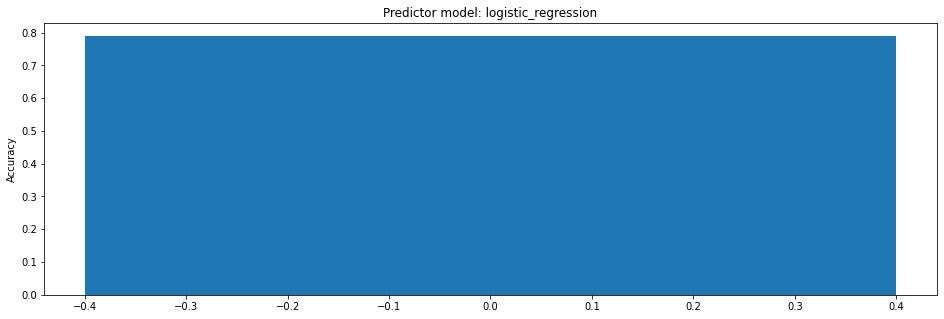

In [11]:
afa_predictor.fit(afa_dataset, 
                  fold = 0, 
                  train_split = 'train', 
                  valid_split = 'val', 
                  fit_again = False)

In [12]:
label_pred = afa_predictor.predict( afa_dataset, fold = 0, split = 'val', n_samples = 1 )

7/7 [==============================] - 0s 1ms/step


In [13]:
label_pred.shape

(40, 5, 1)

### Write report

In [14]:
explanation_file = afa_predictor.directory + 'model_report.md'  # +  'reports/' + 'model_report' 
afa_predictor.explain(file= explanation_file, format = 'markdown')